# Lab 4.01

#### An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

### Some business Objectives:

#### Retain customers,
#### Analyze relevant customer data,
#### Develop focused customer retention programs.
#### Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Import the necessary libraries.

In [23]:
import pandas as pd
import statistics as stats
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder  
from sklearn.model_selection import train_test_split

### Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [24]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

### First look at its main features (head, shape, info).



In [25]:
customer_df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Customer,BU79786,QZ44356,AI49188,WW63253,HB64268,OC83172,XZ87318,CF85061,DY87989,BQ94931,SX51350,VQ65197,DP39365,SJ95423,IL66569,BW63560,FV94802,OE15005,WC83389,FL50705
State,Washington,Arizona,Nevada,California,Washington,Oregon,Oregon,Arizona,Oregon,Oregon,California,California,California,Arizona,California,Oregon,Nevada,California,Oregon,California
Customer Lifetime Value,2763.519279,6979.535903,12887.43165,7645.861827,2813.692575,8256.2978,5380.898636,7216.100311,24127.50402,7388.178085,4738.992022,8197.197078,8798.797003,8819.018934,5384.431665,7463.139377,2566.867823,3945.241604,5710.333115,8162.617053
Response,No,No,No,No,No,Yes,Yes,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No
Coverage,Basic,Extended,Premium,Basic,Basic,Basic,Basic,Premium,Basic,Extended,Basic,Basic,Premium,Basic,Basic,Basic,Basic,Basic,Basic,Premium
Education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor,College,Master,Bachelor,College,College,College,Master,High School or Below,College,Bachelor,High School or Below,College,College,High School or Below
Effective To Date,2/24/11,1/31/11,2/19/11,1/20/11,2/3/11,1/25/11,2/24/11,1/18/11,1/26/11,2/17/11,2/21/11,1/6/11,2/6/11,1/10/11,1/18/11,1/17/11,2/6/11,1/5/11,2/27/11,1/14/11
EmploymentStatus,Employed,Unemployed,Employed,Unemployed,Employed,Employed,Employed,Unemployed,Medical Leave,Employed,Unemployed,Unemployed,Employed,Employed,Employed,Employed,Medical Leave,Medical Leave,Employed,Employed
Gender,F,F,F,M,M,F,F,M,M,F,M,F,M,M,M,F,M,M,M,F
Income,56274,0,48767,0,43836,62902,55350,0,14072,28812,0,0,77026,99845,83689,24599,25049,28855,51148,66140


In [26]:
customer_df.shape

(9134, 24)

In [27]:
customer_df.isnull().sum()/len(customer_df) #No Nans

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

### Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)



In [28]:
customer_df.columns = list(map(lambda x: x.lower().replace(' ','_'), customer_df.columns))

### Change effective to date column to datetime format.

In [29]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

In [30]:
customer_df.nunique()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [31]:
customer_df_num = customer_df.select_dtypes(include=[np.number])

### Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [32]:
def discrete(x):
    
    column = list(x.columns)
    continuous = []
    
    for i in column:
        if x[i].nunique() > 100:
            continuous.append(i)
        else:
            pass
        
    discrete_df = x.drop(continuous, axis =1 )
    return discrete_df

def continuous(x):            
 
    column = list(x.columns)
    discrete = []
    
    for i in column:
        if x[i].nunique() <= 100:
            discrete.append(i)
        else:
            pass
        
    continuous_df = x.drop(discrete, axis =1 )
    return continuous_df

In [33]:
continuous_df = continuous(customer_df_num)

In [34]:
discrete_df = discrete(customer_df_num)

In [35]:
discrete_df.head()

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1


In [36]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


### Plot a correlation matrix, comment what you see.



In [37]:
correlations_matrix = customer_df.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


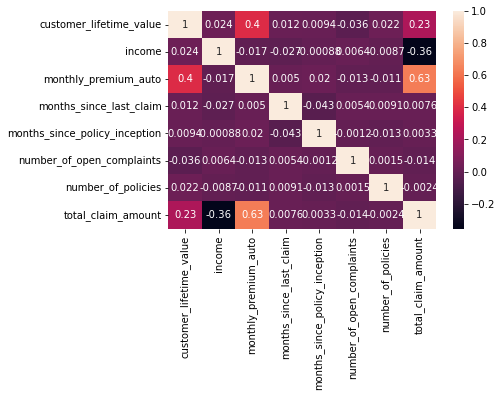

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
sns.heatmap(correlations_matrix, annot=True)
plt.show()

### Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)



In [21]:
def plot_discrete(table):
    for column in table.columns:
        plt.bar(column, column.count())
        plt.show()

In [22]:
plot_discrete(discrete_df)

TypeError: count() takes at least 1 argument (0 given)

In [39]:
def plot_continuous(table):
    
    for column in table.columns:
        table[column].hist(bins=5, legend=True)
        plt.show()

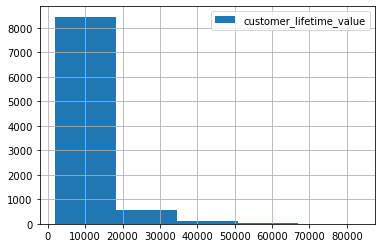

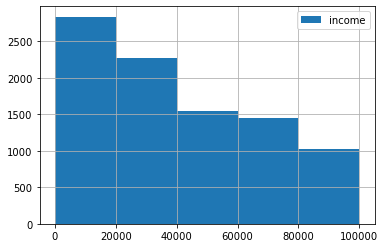

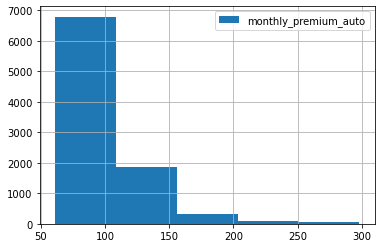

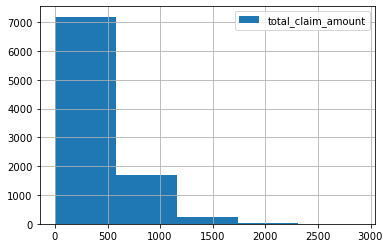

In [40]:
plot_continuous(continuous_df)

### Comment what you can see in the plots.

### Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)



C:\Users\franc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


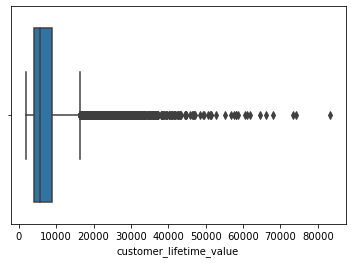

C:\Users\franc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


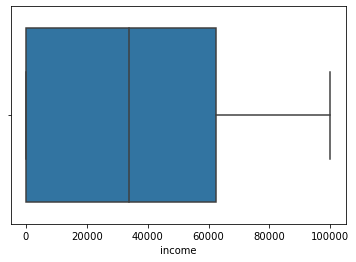

C:\Users\franc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


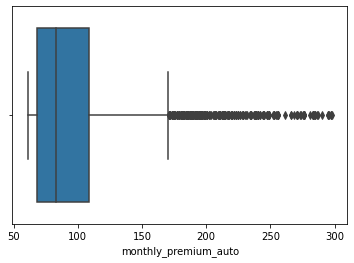

C:\Users\franc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


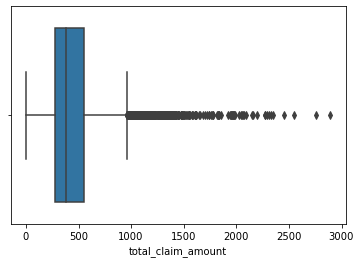

In [41]:
for column in continuous_df.columns:
    sns.boxplot(continuous_df[column])
    plt.show()

### Did you find outliers? Comment what you will do with them.



### Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [42]:
customer_df.isnull().sum()/len(customer_df) #No Nans

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64